# 1. Importación



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# 2. Exploración inicial

In [ ]:
from google.colab import files
uploaded =files.upload()

Saving PFDA_bank_campaigns.csv to PFDA_bank_campaigns.csv


In [ ]:
df_bruto=pd.read_csv("PFDA_bank_campaigns.csv",sep=";")
df = pd.read_csv("PFDA_bank_campaigns.csv",sep=";")

Se mantiene un df original sin cambios, en el df se realizará la limpieza de datos

In [ ]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
0,0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,5191.0,no
1,1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
2,2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,5191.0,no
3,3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,5191.0,no
4,4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,5191.0,no


In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.shape

(41188, 18)

In [ ]:
df1=df.reset_index()

In [ ]:
(df1.iloc[:,0]==df1.iloc[:,1]).all()

np.True_

Se comprueba que la columna unnamed es igual a los índices, se procede a eliminarla

In [ ]:
df=df.iloc[:,1:]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,334.0,1,999,0,nonexistent,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1,999,0,nonexistent,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2,999,0,nonexistent,4963.6,no
41186,44.0,NaN,married,professional.course,no,no,no,cellular,nov,fri,442.0,1,999,0,nonexistent,4963.6,yes


In [ ]:
df.shape

(41188, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          40612 non-null  float64
 1   job          39088 non-null  object 
 2   marital      41188 non-null  object 
 3   education    39912 non-null  object 
 4   default      41188 non-null  object 
 5   housing      41188 non-null  object 
 6   loan         41188 non-null  object 
 7   contact      41188 non-null  object 
 8   month        41188 non-null  object 
 9   day_of_week  41188 non-null  object 
 10  duration     40324 non-null  float64
 11  campaign     41188 non-null  int64  
 12  pdays        41188 non-null  int64  
 13  previous     41188 non-null  int64  
 14  poutcome     41188 non-null  object 
 15  nr.employed  41188 non-null  float64
 16  y            41188 non-null  object 
dtypes: float64(3), int64(3), object(11)
memory usage: 5.3+ MB


In [ ]:
df.age=df.age.astype("Int64")

La edad no es decimal, por ende se convierte a entero

In [ ]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', nan,
       'illiterate'], dtype=object)

Tengo puntos en el texto, se limpian y se dejan como espacios en blanco

In [ ]:
df.education=df.education.str.replace("."," ")

In [ ]:
df.education.unique()

array(['basic 4y', 'high school', 'basic 6y', 'basic 9y',
       'professional course', 'unknown', 'university degree', nan,
       'illiterate'], dtype=object)

In [ ]:
df["nr.employed"]

,nr.employed
0,5191.0
1,5191.0
2,5191.0
3,5191.0
4,5191.0
...,...
41183,4963.6
41184,4963.6
41185,4963.6
41186,4963.6


En este caso, si es necesario dejarlo como float

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,nr.employed
count,40612.0,40324.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.01832,258.538959,2.567593,962.475454,0.172963,5167.035911
std,10.416538,259.439277,2.770014,186.910907,0.494901,72.251528
min,17.0,0.000000,1.000000,0.000000,0.000000,4963.600000
25%,32.0,103.000000,1.000000,999.000000,0.000000,5099.100000
50%,38.0,180.000000,2.000000,999.000000,0.000000,5191.000000
75%,47.0,320.000000,3.000000,999.000000,0.000000,5228.100000
max,98.0,4918.000000,56.000000,999.000000,7.000000,5228.100000


### Duplicados

In [ ]:
df.duplicated().sum()

np.int64(12)

No existen registros duplicados, por lo que no hay riesgo de redundancia o distorsión en el análisis.

In [ ]:
df.isna().sum().sort_values(ascending=False)


,0
job,2100
education,1276
duration,864
age,576
marital,0
housing,0
loan,0
contact,0
default,0
month,0


### Nulos

In [ ]:
df.isnull().sum()

,0
age,576
job,2100
marital,0
education,1276
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


### Outliers

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,nr.employed
count,40612.0,40324.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.01832,258.538959,2.567593,962.475454,0.172963,5167.035911
std,10.416538,259.439277,2.770014,186.910907,0.494901,72.251528
min,17.0,0.000000,1.000000,0.000000,0.000000,4963.600000
25%,32.0,103.000000,1.000000,999.000000,0.000000,5099.100000
50%,38.0,180.000000,2.000000,999.000000,0.000000,5191.000000
75%,47.0,320.000000,3.000000,999.000000,0.000000,5228.100000
max,98.0,4918.000000,56.000000,999.000000,7.000000,5228.100000


En ninguno de los casos la mediana y el promedio son iguales, por lo que se puede inferir que probablemente hay outliers que provocan sesgos

In [ ]:
df.dtypes.reset_index()

,index,0
0,age,Int64
1,job,object
2,marital,object
3,education,object
4,default,object
5,housing,object
6,loan,object
7,contact,object
8,month,object
9,day_of_week,object


In [ ]:
df.isna().sum().reset_index()

,index,0
0,age,576
1,job,2100
2,marital,0
3,education,1276
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,0


### Análisis de distribución de variables

Text(0, 0.5, 'Frecuencia')

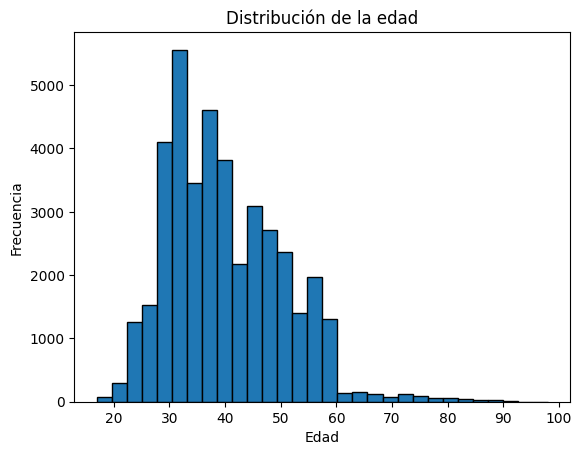

In [ ]:
plt.hist(df["age"].dropna(), bins=30, edgecolor="black")
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

La mayoría de clientes se concentra entre los 30 y 50 años. Se puede observar que la distribución cae en edades más jóvenes y mayores, mostrando que el público principal es adulto.

Se utilizó un histograma porque nos permite visualizar cómo se distribuyen las edades en todo el grupo. Nos muestra en qué rangos hay más personas y cómo va disminuyendo la frecuencia a medida que la edad sube.

Text(0, 0.5, 'Segundos de duración')

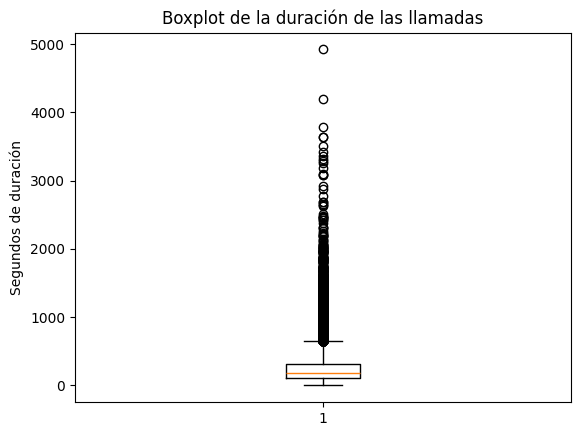

In [ ]:
plt.boxplot(df["duration"].dropna(), vert=True)
plt.title("Boxplot de la duración de las llamadas")
plt.ylabel("Segundos de duración")

La duración de las llamadas es altamente asimétrica, con muchos valores atípicos hacia arriba. La mayoría de llamadas son cortas, las muy largas son excepciones.

Se utilizó un gráfico de tipo boxplot porque resume de manera sencilla cómo se comportan las duraciones de las llamadas y muestra de inmediato si hay valores muy altos o inusuales. Adicionalmente, nos permite ver la mediana, la concentración de la mayoría de llamadas y todos los outliers que se salen del patrón normal.

Text(0, 0.5, 'Cantidad de clientes')

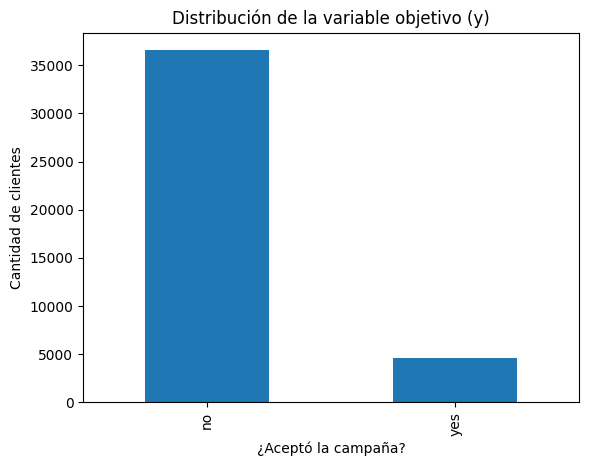

In [ ]:
df["y"].value_counts().plot(kind="bar")
plt.title("Distribución de la variable objetivo (y)")
plt.xlabel("¿Aceptó la campaña?")
plt.ylabel("Cantidad de clientes")

El dataset está desbalanceado, es decir que la mayoría de clientes no aceptó la campaña.

Se utilizó un gráfico de barras porque nos permite comparar cuántas personas dijeron “sí” y cuántas dijeron “no”.

###  **¿La duración de la llamada se relaciona con la respuesta del cliente?**

In [ ]:
df["outcome"]=df.y.replace({"yes" : 1, "no" : 0})


/tmp/ipython-input-378464742.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["outcome"]=df.y.replace({"yes" : 1, "no" : 0})


In [ ]:
df.groupby("outcome")["duration"].mean()

,duration
outcome,
0,221.105724
1,553.439014


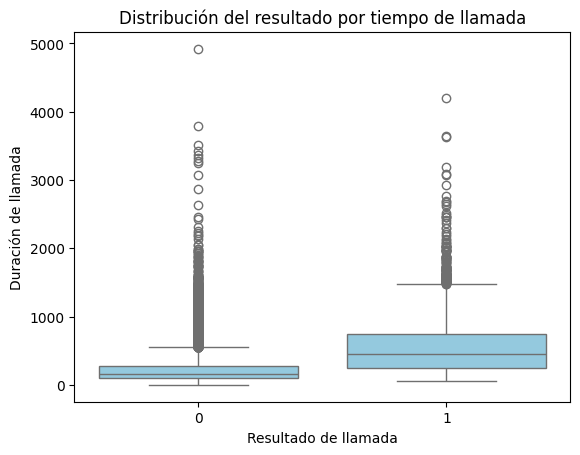

In [ ]:
sns.boxplot(data=df,y="duration",x="outcome", color="skyblue")
plt.title("Distribución del resultado por tiempo de llamada")
plt.ylabel("Duración de llamada")
plt.xlabel("Resultado de llamada")
plt.show()

In [ ]:
q1=df.duration.quantile(0.25)
q3=df.duration.quantile(0.75)
iqr=q3-q1

In [ ]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqrD

NameError: name 'iqrD' is not defined

In [ ]:
df_sin_outliers=df[(df.duration>=lim_inf)&(df.duration<=lim_sup)]

In [ ]:
sns.boxplot(data=df_sin_outliers,y="duration",x="outcome", color="skyblue")
plt.title("Distribución del resultado por tiempo de llamada")
plt.ylabel("Duración de llamada")
plt.xlabel("Resultado de llamada")
plt.show()

Se evidencia que la mediana es mayor para los resultados positivos, por lo cual se puede decir que la duración de la llamada si influye en el resultado

## **¿Qué perfiles de cliente tienen mayor probabilidad de aceptar la campaña?**

## **¿Clientes con campañas previas muestran mayor probabilidad de aceptar?**

In [ ]:
df.head()

In [ ]:
df["outcome"] = df["y"].replace({"yes": 1, "no": 0})     #Convertimos nuestros valores de la columna 'y' en numéricos.

In [ ]:
df["campañas_previas"] = df["pdays"].apply(
    lambda x: "Sí tuvo campañas previas" if x != 999 else "No tuvo campañas previas"
)

# De esta forma identificaremos si el cliente tuvo compañas previas, a través de la columna 'pdays'( 999 significa que NO hubo contacto previo)

In [ ]:
prob_previa = df.groupby("campañas_previas")["outcome"].mean().reset_index()
prob_previa

/tmp/ipython-input-3980998649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prob_previa, x="campañas_previas", y="outcome", palette=colors)


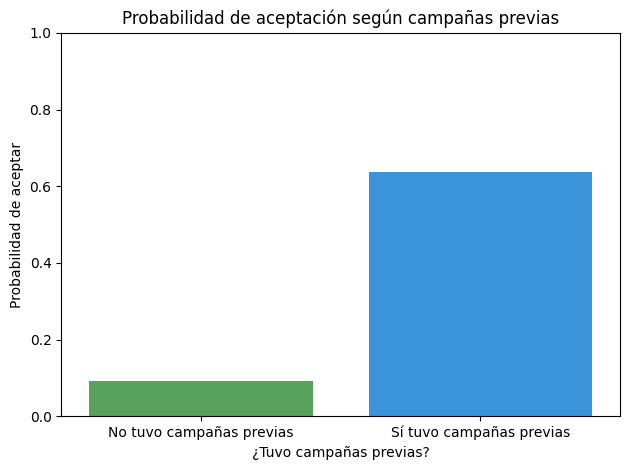

In [ ]:
colors = ["#4CAF50", "#2196F3"]
sns.barplot(data=prob_previa, x="campañas_previas", y="outcome", palette=colors)

plt.title("Probabilidad de aceptación según campañas previas")
plt.xlabel("¿Tuvo campañas previas?")
plt.ylabel("Probabilidad de aceptar")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


## **¿El mes o día de contacto influye en la tasa de aceptación?**

Tasa de aceptación mensual

/tmp/ipython-input-3344486328.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["outcome"] = df.y.replace({"yes": 1, "no": 0})


Text(0, 0.5, 'Tasa de aceptación (%)')

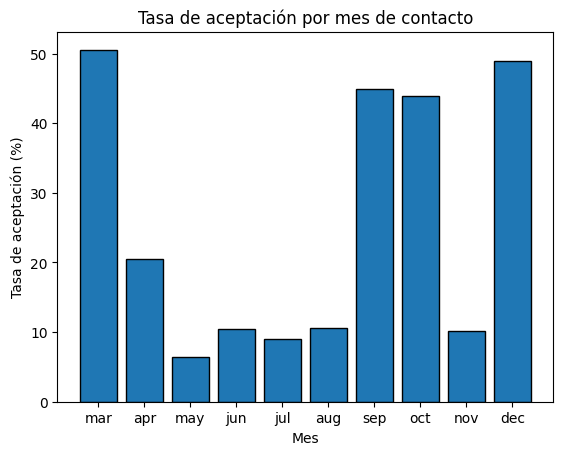

In [ ]:
df["outcome"] = df.y.replace({"yes": 1, "no": 0})
tasa_mensual = df.groupby("month")["outcome"].mean().reset_index()
orden_en_meses = ["jan", "feb", "mar", "apr", "may", "jun",
                  "jul", "aug", "sep", "oct", "nov", "dec"]
tasa_mensual["month"] = pd.Categorical(
    tasa_mensual["month"],
    categories=orden_en_meses,
    ordered=True
)
tasa_mensual = tasa_mensual.sort_values("month")
plt.bar(tasa_mensual["month"], tasa_mensual["outcome"]*100, edgecolor="black")
plt.title("Tasa de aceptación por mes de contacto")
plt.xlabel("Mes")
plt.ylabel("Tasa de aceptación (%)")





El gráfico muestra variaciones claras entre meses. Meses como marzo, septiembre y diciembre presentan tasas de aceptación mucho más altas, superando el 45–50%. En contraste, meses como mayo, junio y noviembre muestran tasas considerablemente más bajas.
Estas diferencias indican que el mes de contacto sí influye en la probabilidad de que un cliente acepte la campaña, ya que la respuesta no es uniforme a lo largo del año.

Tasa de aceptación por día del mes

Text(0, 0.5, 'Tasa de aceptación (%)')

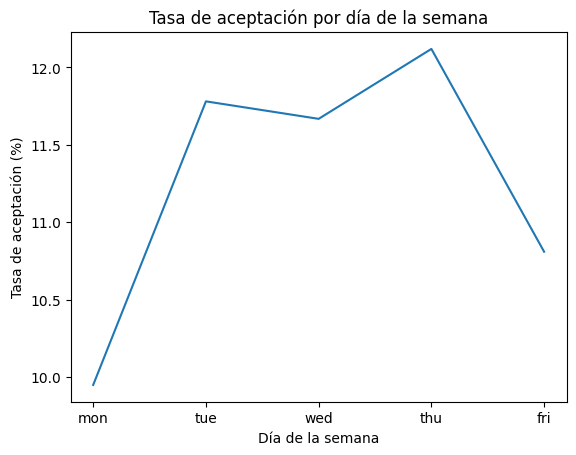

In [ ]:
tasa_diaria = df.groupby("day_of_week")["outcome"].mean().reset_index()
orden_dias = ["mon", "tue", "wed", "thu", "fri"]
tasa_diaria["day_of_week"] = pd.Categorical(
    tasa_diaria["day_of_week"],
    categories=orden_dias,
    ordered=True
)
tasa_diaria = tasa_diaria.sort_values("day_of_week")
plt.plot(tasa_diaria["day_of_week"], tasa_diaria["outcome"]*100)
plt.title("Tasa de aceptación por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Tasa de aceptación (%)")

La tasa de aceptación también presenta variaciones según el día de la semana. El gráfico evidencia que jueves es el día con la mayor aceptación, mientras que lunes y viernes presentan los valores más bajos.
Esto sugiere que el día de contacto tiene un impacto en la probabilidad de aceptación, siendo a mitad de semana cuando los clientes parecen estar más receptivos a la campaña.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PFDA_bank_campaigns (4).csv to PFDA_bank_campaigns (4).csv


In [ ]:
import pandas as pd

df = pd.read_csv("PFDA_bank_campaigns (4).csv", sep=";")
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
0,0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,5191.0,no
1,1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
2,2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,5191.0,no
3,3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,5191.0,no
4,4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,5191.0,no


## **¿Qué variables parecen ser más determinantes en la respuesta final?**

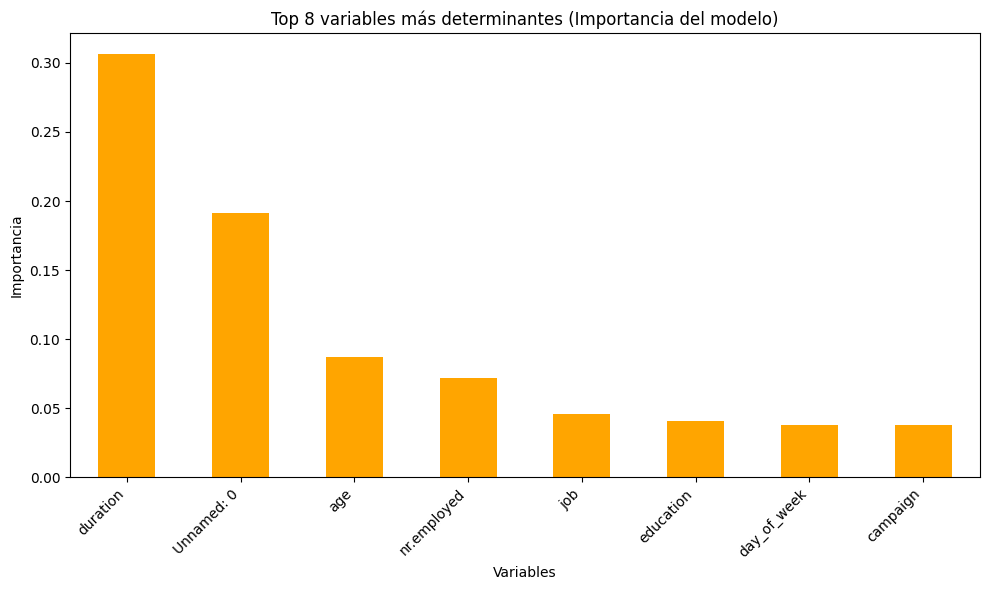

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# ============================================
# 1. Cargar el archivo
# ============================================
df = pd.read_csv("PFDA_bank_campaigns (4).csv", sep=";")

# ============================================
# 2. Preprocesamiento básico
# - Identificar y convertir variables categóricas
# - Identificar la variable objetivo "y"
# ============================================
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].dtype == "object":
        df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Variable objetivo
target = "y"
X = df_clean.drop(columns=[target])
y = df_clean[target]

# ============================================
# 3. Entrenar un modelo Random Forest
# ============================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Obtener importancias
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(8)

# ============================================
# 4. Visualización del gráfico
# ============================================
plt.figure(figsize=(10,6))
top_features.plot(kind='bar', color='orange')
plt.title("Top 8 variables más determinantes (Importancia del modelo)")
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

La gráfica anterior muestra las 8 variables más importantes según un modelo Random Forest entrenado con el dataset de la campaña bancaria. Estas importancias indican cuánto contribuye cada variable a predecir si un cliente acepta o rechaza la campaña de marketing.